#### CRIPS DM

## Bussines Understanding

Masalah terkena kanker paru-paru dan tidak terkena kanker paru-paru adalah dua keadaan yang berbeda yang dapat dialami oleh individu. Penting untuk diingat bahwa kanker paru-paru dapat dicegah atau risikonya dapat dikurangi dengan menjalani gaya hidup sehat, menghindari merokok, mengurangi paparan lingkungan berbahaya, dan mengikuti langkah-langkah pencegahan yang dianjurkan oleh tenaga medis. Jika Anda memiliki kekhawatiran tentang risiko Anda terkena kanker paru-paru, disarankan untuk berkonsultasi dengan dokter untuk evaluasi lebih lanjut dan saran medis yang tepat.

Kanker paru-paru dapat mengganggu fungsi normal paru-paru dan sistem pernapasan. Ini dapat menyebabkan gejala seperti batuk kronis, sesak napas, nyeri dada, kelelahan, penurunan berat badan yang tidak diinginkan, batuk berdarah, dan infeksi paru-paru berulang. Kanker paru-paru juga dapat menyebar ke organ lain dalam tubuh, seperti tulang, hati, otak, atau kelenjar getah bening, yang dapat memperburuk kondisi dan menyebabkan komplikasi yang serius.

dataset yang saya ambil dari kaggle : https://www.kaggle.com/datasets/mdshahjalal2021/lung-cancer-survey-using-classification

## Data Understanding


 Data dikumpulkan dari berbagai sumber, termasuk rekam medis, survei, dan data yang dilaporkan sendiri. Dataset mencakup kolom berikut:

GENDER = Jenis Kelamin Pasien

AGE	= Umur Pasien

SMOKING = Pasien yang merokok

YELLOW_FINGERS = Tangan kuning

ANXIETY = Kecemasan

PEER_PRESSURE = Tekanan dari orang lain

CHRONIC_DISEASE = Penyakit kronis

FATIGUE = Kelelahan

ALLERGY = Alergi

WHEEZING = Nafas menciut ciut

ALCOHOL_CONSUMING	= Mengkonsumsi alkohol

COUGHING = Batuk

SHORTNESS_OF_BREATH = Nafas pendek

SWALLOWING_DIFFICULTY = Kesulitan menelan

CHEST_PAIN = Nyeri dada

In [1]:
import pandas as pd
import numpy as np

# load dataset

In [2]:
df = pd.read_csv('lung cancer(survey).csv')
df.sample()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
54,F,57,1,2,1,2,2,2,2,1,2,2,1,1,1,YES


In [3]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [6]:
numerical

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [7]:
catgcols

['GENDER', 'LUNG_CANCER']

In [8]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [9]:
ind_col = [col for col in df.columns if col !='LUNG_CANCER']
dep_col = 'LUNG_CANCER'

In [10]:
df[dep_col].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

# transformasi dataset

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [12]:
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

In [13]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [14]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [15]:
df.to_csv('lung_cancer(survey).csv', index=False)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# membuat model decision tree

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=40, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9230769230769231
akurasi data testing = 0.8387096774193549 

confusion matrix : 
[[ 4  6]
 [ 4 48]]

classification report : 
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.89      0.92      0.91        52

    accuracy                           0.84        62
   macro avg       0.69      0.66      0.68        62
weighted avg       0.83      0.84      0.83        62



# simulasi model

In [18]:
input_data = (1,69,1,2,2,1,1,2,1,2,2,2,2,2,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('pasien tidak terkena Kangker Paru-paru')
else:
    print ('pasien terkena Kangker Paru-paru')

[1]
pasien tidak terkena Kangker Paru-paru


c:\Users\deden\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# visualisasi pohon keputusan

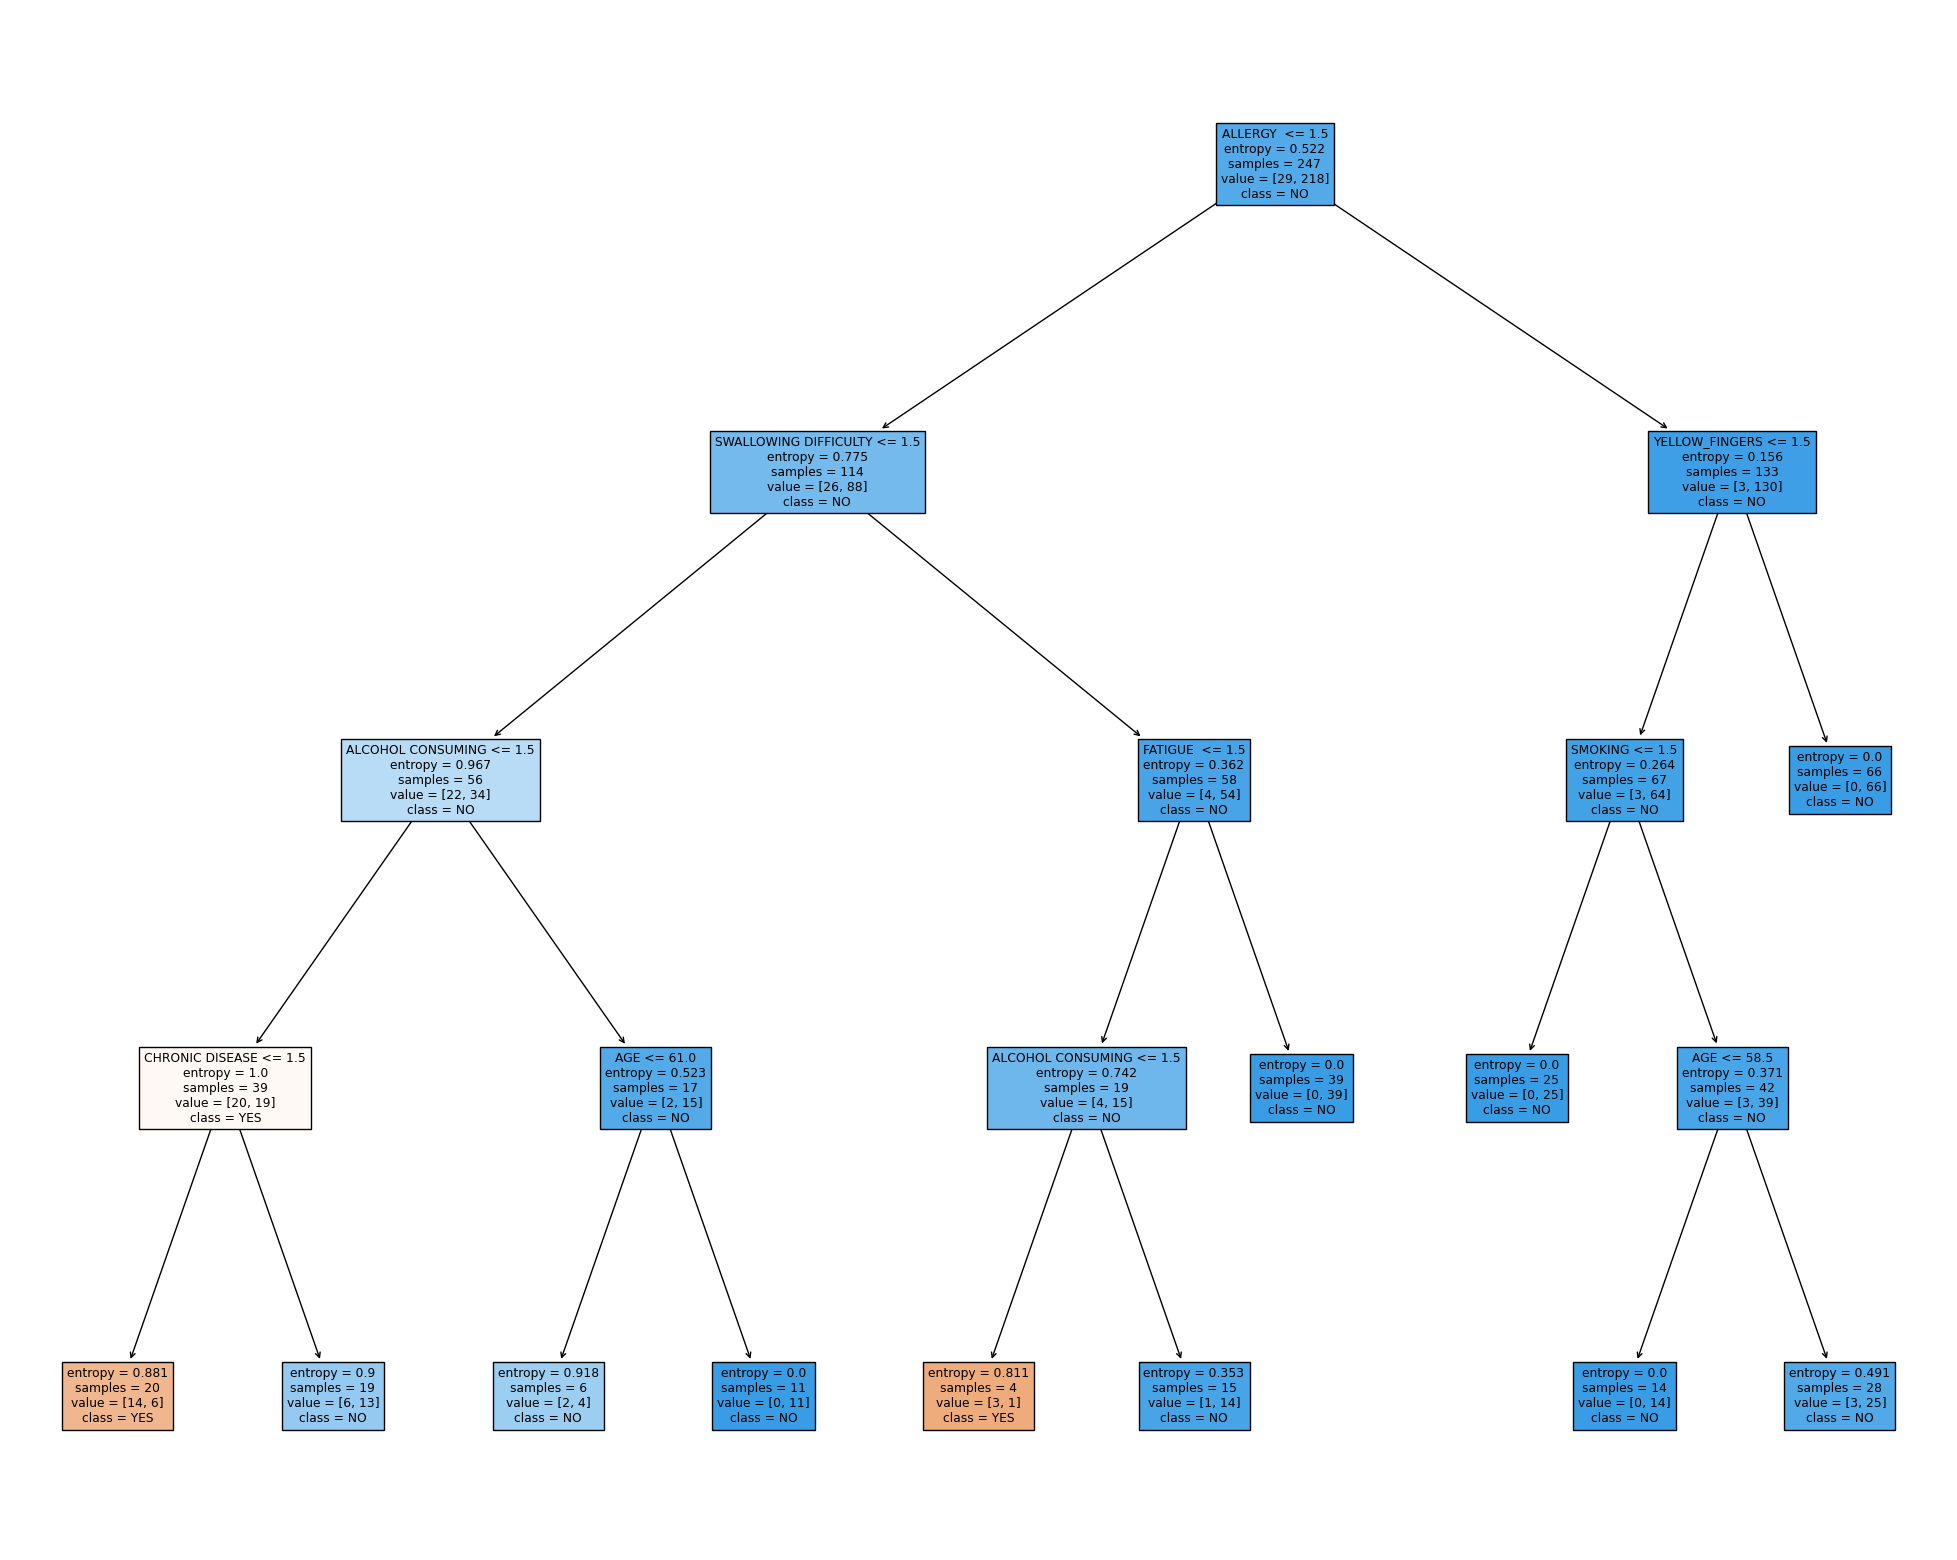

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['YES', 'NO'],
                   filled=True)         

In [22]:
import pickle

filename = 'lung_cancer.sav'
pickle.dump(model, open(filename, 'wb'))